In [74]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv('../Assets/salary.txt', sep= '\s+')
print df.dtypes
print df.head()

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object
       sx    rk  yr         dg  yd     sl
0    male  full  25  doctorate  35  36350
1    male  full  13  doctorate  22  35350
2    male  full  10  doctorate  23  28200
3  female  full   7  doctorate  27  26775
4    male  full  19    masters  30  33696


In [37]:
# Describe data
for item in df.columns:
    print item
    print df[item].describe()
    print '\n\n'

sx
count       52
unique       2
top       male
freq        38
Name: sx, dtype: object



rk
count       52
unique       3
top       full
freq        20
Name: rk, dtype: object



yr
count    52.000000
mean      7.480769
std       5.507536
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      25.000000
Name: yr, dtype: float64



dg
count            52
unique            2
top       doctorate
freq             34
Name: dg, dtype: object



yd
count    52.000000
mean     16.115385
std      10.222340
min       1.000000
25%       6.750000
50%      15.500000
75%      23.250000
max      35.000000
Name: yd, dtype: float64



sl
count       52.000000
mean     23797.653846
std       5917.289154
min      15000.000000
25%      18246.750000
50%      23719.000000
75%      27258.500000
max      38045.000000
Name: sl, dtype: float64





In [75]:
# Check Categorical Variables
print df['sx'].value_counts(), '\n'
print df['dg'].value_counts(), '\n'
print df['rk'].value_counts()

male      38
female    14
Name: sx, dtype: int64 

doctorate    34
masters      18
Name: dg, dtype: int64 

full         20
assistant    18
associate    14
Name: rk, dtype: int64


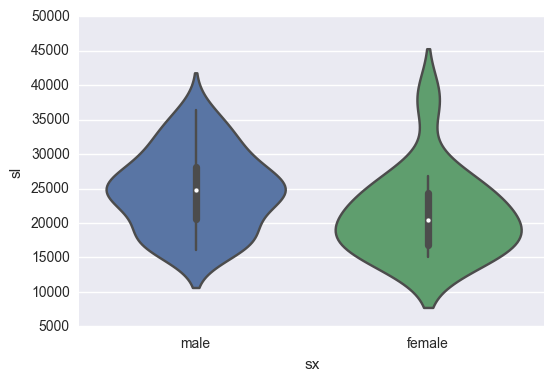

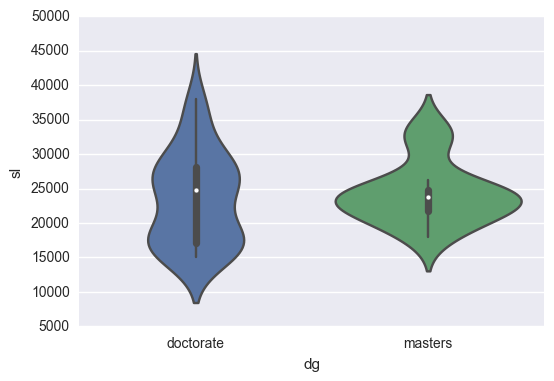

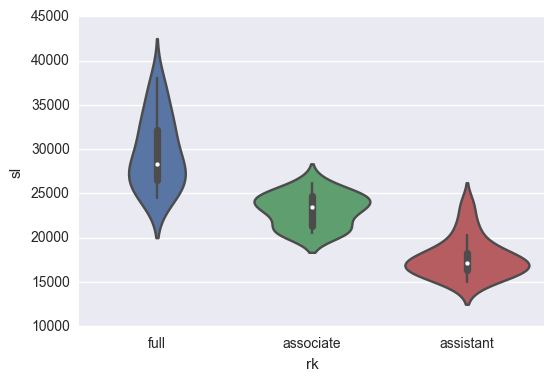

In [39]:
# Violin Plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [76]:
df_dummy = pd.get_dummies(df, columns=['rk', 'sx', 'dg'])
df_dummy.drop(['sx_male', 'rk_full', 'dg_masters'], axis=1, inplace=True)
df_dummy.head()

# # Create dummies for categorical variables
# categories = ["sx", "rk", "dg"]
# for category in categories:
#     series = df[category]
#     dummies = pd.get_dummies(series, prefix=category)
#     df = pd.concat([df, dummies], axis=1)
# df.columns


,yr,yd,sl,rk_assistant,rk_associate,sx_female,dg_doctorate
0,25,35,36350,0.0,0.0,0.0,1.0
1,13,22,35350,0.0,0.0,0.0,1.0
2,10,23,28200,0.0,0.0,0.0,1.0
3,7,27,26775,0.0,0.0,1.0,1.0
4,19,30,33696,0.0,0.0,0.0,0.0


In [46]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

Sample: 0.997027576932
All data with sample model: 0.501988153847
Sample with regularization: 0.997027551024
All data with regularization model: 0.502013612601


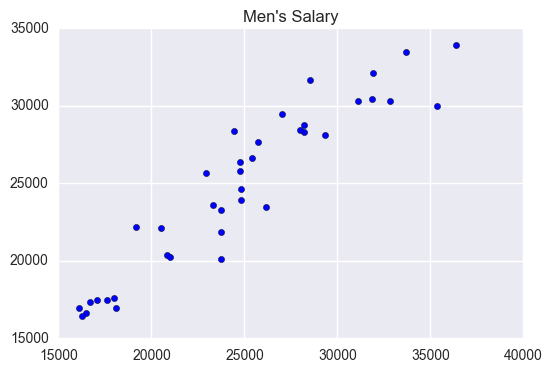

Linear Men-Men: 0.88630543814


In [104]:
# Fit a model to the men
mask = df_dummy['sx_female'] == 0
X = df_dummy[mask].drop(['sl'], axis=1)
y = df_dummy[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Men\'s Salary')
plt.show()

# ## and print the model score
print "Linear Men-Men:", model.score(X, y)





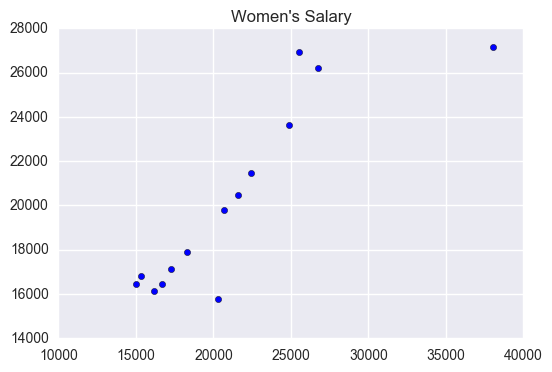

Linear Men-Women: 0.69448811957


In [105]:
# Apply the same model to the women and compare the model score
# Fit a model to the women
mask = df_dummy['sx_female'] == 1
X = df_dummy[mask].drop('sl', axis=1)
y = df_dummy[mask][u'sl']

predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Women\'s Salary')
plt.show()

# ## and print the model score
print "Linear Men-Women:", model.score(X, y)

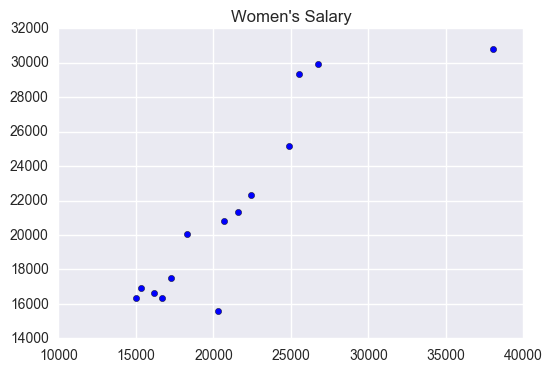

Linear Women-Women: 0.781837240731


In [106]:
# What about the other order? Apply to women first
# Fit a model 
mask = df_dummy['sx_female'] == 1
X = df_dummy[mask].drop(['sl'], axis=1)
y = df_dummy[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Women\'s Salary')
plt.show()

# ## and print the model score
print "Linear Women-Women:", model.score(X, y)




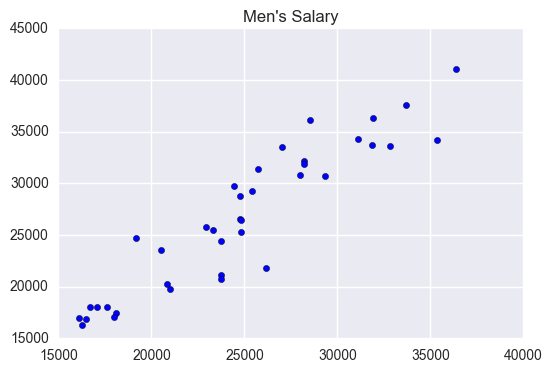

Linear Women-Men: 0.657523429275


In [107]:
# Apply to men
# Fit a model
mask = df_dummy['sx_female'] == 0
X = df_dummy[mask].drop('sl', axis=1)
y = df_dummy[mask][u'sl']

predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Men\'s Salary')
plt.show()

# ## and print the model score
print "Linear Women-Men:", model.score(X, y)

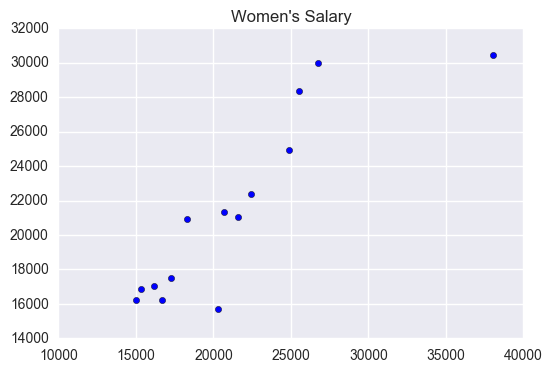

RidgeCV Women-Women: 0.776844725719


In [108]:
# This time use regularlization (RidgeCV)

# Apply to women first
mask = df_dummy['sx_female'] == 1
X = df_dummy[mask].drop(['sl'], axis=1)
y = df_dummy[mask][u'sl']

## Fit a linear model here
rcv = linear_model.RidgeCV()
model = rcv.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Women\'s Salary')
plt.show()

# ## and print the model score
print "RidgeCV Women-Women:", model.score(X, y)



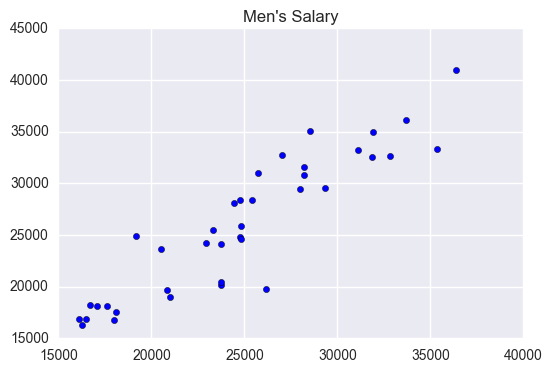

RidgeCV Women-Men: 0.718188759585


In [109]:
# Apply to men
# Fit a model
mask = df_dummy['sx_female'] == 0
X = df_dummy[mask].drop('sl', axis=1)
y = df_dummy[mask][u'sl']

predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Men\'s Salary')
plt.show()

# ## and print the model score
print "RidgeCV Women-Men:", model.score(X, y)

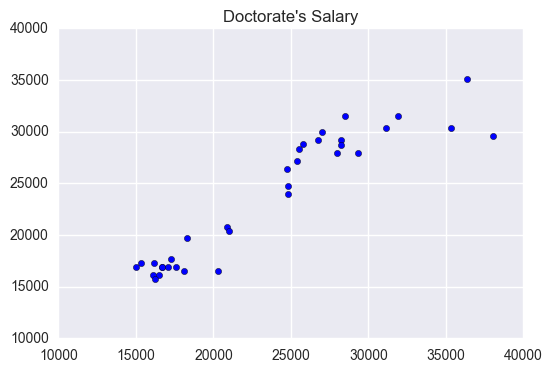

Linear Doctorate-Doctorate: 0.876486548837


In [110]:
# What about using Degree as dummy?
# Fit a model 
mask = df_dummy['dg_doctorate'] == 1
X = df_dummy[mask].drop(['sl'], axis=1)
y = df_dummy[mask][u'sl']

## Fit a linear model here
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Doctorate\'s Salary')
plt.show()

# ## and print the model score
print "Linear Doctorate-Doctorate:", model.score(X, y)




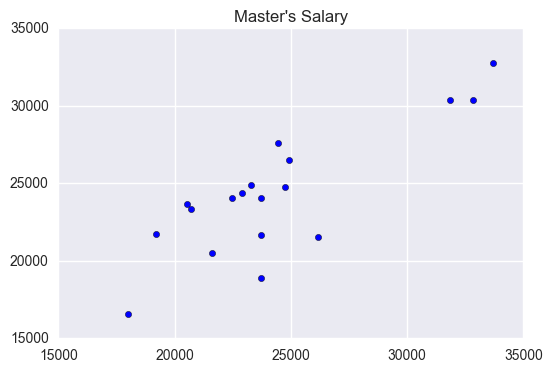

Linear Doctorate-Masters: 0.6849888843


In [111]:
# Apply to Masters
# Fit a model
mask = df_dummy['dg_doctorate'] == 0
X = df_dummy[mask].drop('sl', axis=1)
y = df_dummy[mask][u'sl']

predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Master\'s Salary')
plt.show()

# ## and print the model score
print "Linear Doctorate-Masters:", model.score(X, y)

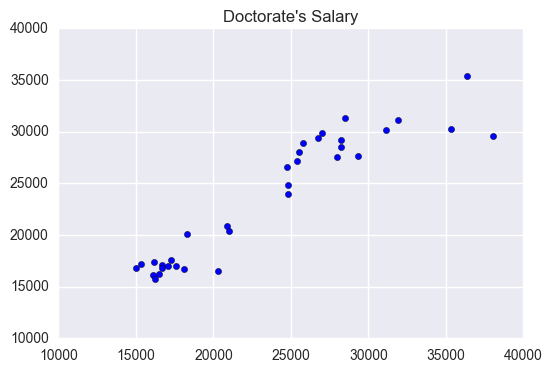

RidgeCV Doctorate-Doctorate: 0.875812397788


In [112]:
#RidgeCV
# Fit a model 
mask = df_dummy['dg_doctorate'] == 1
X = df_dummy[mask].drop(['sl'], axis=1)
y = df_dummy[mask][u'sl']

## Fit a linear model here
rcv = linear_model.RidgeCV()
model = rcv.fit(X, y)
predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Doctorate\'s Salary')
plt.show()

# ## and print the model score
print "RidgeCV Doctorate-Doctorate:", model.score(X, y)


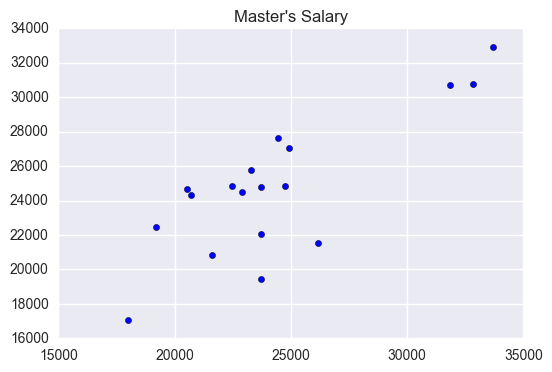

RidgeCV Doctorate-Masters: 0.628993591892


In [113]:
# Apply to Masters
# Fit a model
mask = df_dummy['dg_doctorate'] == 0
X = df_dummy[mask].drop('sl', axis=1)
y = df_dummy[mask][u'sl']

predictions = model.predict(X)

## Plot the data
plt.scatter(y, predictions)
plt.title('Master\'s Salary')
plt.show()

# ## and print the model score
print "RidgeCV Doctorate-Masters:", model.score(X, y)